In [1]:
# # Add Matplotlib inline magic command
# %matplotlib inline
# # dependencies and setup
# import matplotlib.pyplot as plt
# import pandas as pd

# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import os 

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"



In [3]:
# Read the city data file and store it in a pandas DF
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)


,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Read the ride data file and store it in a pandas DF
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)


,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
# get the columns and the rows thatr are not null
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
# Get the columns and the rows that are not null
city_data_df.isnull().sum()


city            0
driver_count    0
type            0
dtype: int64

In [7]:
# Get the data time of each column
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
# Get the unique values of city types
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
# Get the number of the data points from the urban cities
sum(city_data_df['type']=="Urban")

66

In [10]:
sum(city_data_df['type']=="Suburban")


36

In [11]:
sum(city_data_df['type']=="Rural")



18

In [12]:
# Get the columns and the rows that are not null
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [13]:
# Get the columns and rows not null
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [14]:
# Get the data types of each column
ride_data_df.dtypes


city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [15]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# show the df
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [16]:
# Create the urban city DF
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [17]:
# create the suburban and rural dfs
suburban_cities_df = pyber_data_df[pyber_data_df['type']=="Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df['type']=="Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [18]:
# # Get the number of rides for urban cities
# urban_ride_count = urban_cities_df.groupby(['city'].count()['ride_id']
# urban_ride_count.head()

# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [19]:
# Create the suburban and rural ride count
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]

rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [20]:
# Get aberage fare for each city in the urban cities
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [21]:
# Get average fare for each city in suburban and rural cities
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [22]:
# Get the average number of drivers for each urban city
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [23]:
# Get suburban and rural averages for each city
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

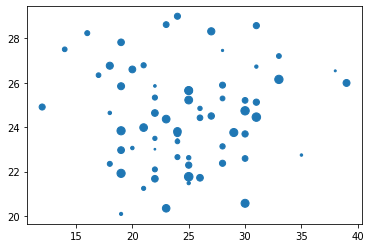

In [24]:
# # Build the scatter plots for urban cities #This output "<matplotlib.collections.PathCollection at 0x7f99c1e12cd0>" above an otherwise correct scatter plot
# plt.scatter(urban_ride_count, urban_avg_fare)

plt.scatter(urban_ride_count, 
            urban_avg_fare,
           s=urban_driver_count)

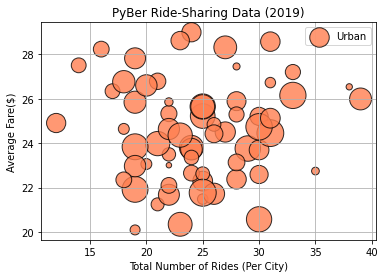

In [25]:
# Build the scatter plots for urban cities
plt.scatter(urban_ride_count,
            urban_avg_fare,
            s=10*urban_driver_count, c="coral",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
#Add legend
plt.legend()

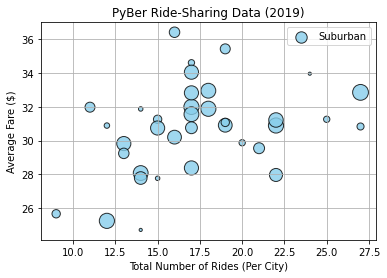

In [26]:
# Build the suburban one
plt.scatter(suburban_ride_count,
           suburban_avg_fare,
           s=10*suburban_driver_count, c="skyblue",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
#Add legend
plt.legend()

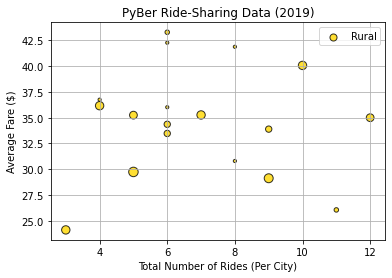

In [27]:
# # Build the Rural plot ####This errored as "ValueError: s must be a scalar, or float array-like with the same size as x and y"
# plt.scatter(suburban_ride_count,
#            suburban_avg_fare,
#            s=10*rural_driver_count, c="gold",
#            edgecolor="black", linewidths=1,
#            alpha=0.8, label="Rural")
# plt.title("PyBer Ride-Sharing Data (2019)")
# plt.ylabel("Average Fare ($)")
# plt.xlabel("Total Number of Rides (Per City)")
# plt.grid(True)
# # Add the legend
# plt.legend()

# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()


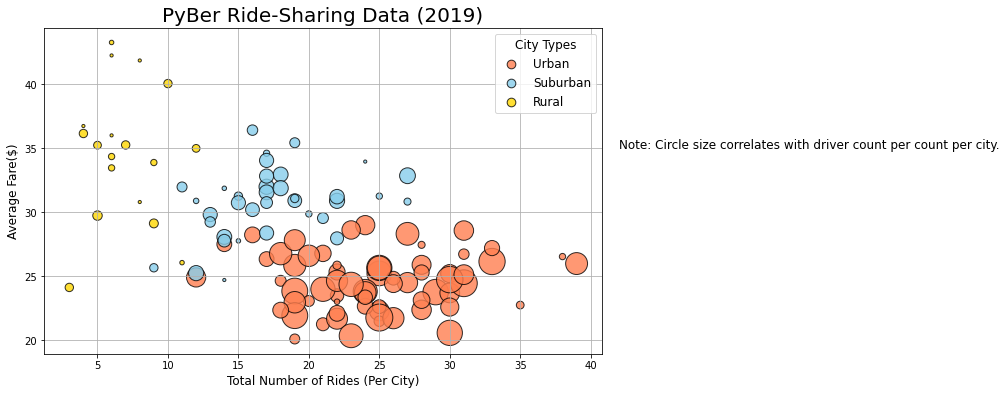

In [28]:
# Add the scatter charts for each type of city
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count,
           urban_avg_fare,
           s=10*urban_driver_count, c="coral",
           edgecolor="black", linewidths=1,
           alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
           suburban_avg_fare,
           s=10*suburban_driver_count, c="skyblue",
           edgecolor="black", linewidths=1,
           alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
           rural_avg_fare,
           s=10*rural_driver_count, c="gold",
           edgecolor="black", linewidths=1,
           alpha=0.8, label="Rural")
             
# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)
             
# #Add legend
# plt.legend()
# Create a legend and make it nice
lgnd = plt.legend(fontsize="12", mode="Expanded",
                 scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

#Incorporate a text label about circle size
plt.text(42,35, "Note: Circle size correlates with driver count per count per city.", fontsize="12")

#Save the figure
plt.savefig("analysis/Fig1.png")

#Show the plot
plt.show()


In [31]:
# Get summary stats with pandas describe function
urban_cities_df.describe()


,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [32]:
# Get the rest
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [33]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [34]:
#Get sum stats
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [35]:
suburban_ride_count.describe()


count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [36]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [37]:
# Get sum stats with Pandas mean median mode methods
#Calculate the mean of the ride count for each city type
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [38]:
#Calculate the median of the ride count for each city type
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [39]:
#Calculate the mode of the ride count for each city type
round(urban_ride_count.mode(),2), round(suburban_ride_count.mode(),2), round(rural_ride_count.mode(),2)

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [40]:
# Import numpy and the stats module from sciPy
import numpy as np
import scipy.stats as sts

In [49]:
# Calculate the measures of central tendency for the ride count for three scity types
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62
The median for the ride counts for urban trips is 24.0
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).


In [52]:
# Calculate the measures of central tendency for the ride count for three scity types
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts forsub urban trips is {median_suburban_ride_count}")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36
The median for the ride counts forsub urban trips is 17.0
The mode for the ride counts for suburban trips is ModeResult(mode=array([17]), count=array([7])).


In [53]:
# Calculate the measures of central tendency for the ride count for three scity types
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94
The median for the ride counts for rural trips is 6.0
The mode for the ride counts for rural trips is ModeResult(mode=array([6]), count=array([5])).


In [54]:
# Get the fares for the urban cities.
urban_fares=urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [56]:
# Calculate the measures of central tendency for the average fare for urban cities
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is ${mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is $ModeResult(mode=array([22.86]), count=array([5])).


In [57]:
suburban_fares=suburban_cities_df["fare"]

In [58]:
# Calculate the measures of central tendency for the average fare for suburban cities
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is ${mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is $ModeResult(mode=array([17.99]), count=array([3])).


In [60]:
rural_fares=rural_cities_df["fare"]

In [61]:
# Calculate the measures of central tendency for the average fare for suburban cities
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is ${mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is $ModeResult(mode=array([37.05]), count=array([2])).


In [64]:
# Get dtiver counts for urban, suburban and rural
urban_drivers=urban_cities_df["driver_count"]
suburban_drivers=suburban_cities_df["driver_count"]
rural_drivers=rural_cities_df["driver_count"]

In [71]:
#Get sum stats on drivers for each city type
# Calculate the measures of central tendency for drivers for urban cities
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean drivers for urban cities is {mean_urban_drivers:.0f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median drivers for urban cities is {median_urban_drivers:.0f}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode drivers for urban cities is {mode_urban_drivers}.")

The mean drivers for urban cities is 37.
The median drivers for urban cities is 37.
The mode drivers for urban cities is ModeResult(mode=array([39]), count=array([86])).


In [72]:
# Calculate the measures of central tendency for drivers for suburban cities
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean drivers for suburban cities is {mean_suburban_drivers:.0f}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median drivers for suburban cities is {median_suburban_drivers:.0f}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode drivers for suburban cities is {mode_suburban_drivers}.")

The mean drivers for suburban cities is 14.
The median drivers for suburban cities is 16.
The mode drivers for suburban cities is ModeResult(mode=array([20]), count=array([79])).


In [73]:
# Calculate the measures of central tendency for drivers for rural cities
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean drivers for suburban cities is {mean_rural_drivers:.0f}.")

median_rural_drivers = np.median(rural_drivers)
print(f"The median drivers for suburban cities is {median_rural_drivers:.0f}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode drivers for suburban cities is {mode_rural_drivers}.")

The mean drivers for suburban cities is 4.
The median drivers for suburban cities is 4.
The mode drivers for suburban cities is ModeResult(mode=array([1]), count=array([32])).


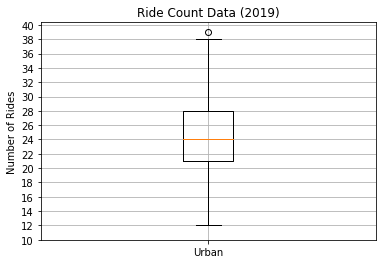

In [79]:
# Creat a box and whisker plot for urban ride count
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
#add the ittle, y_axis label and grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10,41, step=2.0))
ax.grid()
plt.show()

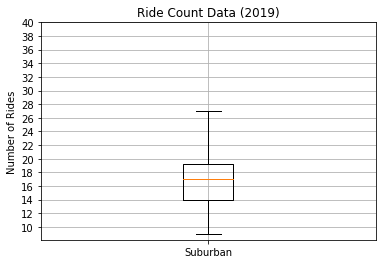

In [80]:
# Creat a box and whisker plot for suburban ride count
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)
#add the ittle, y_axis label and grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10,41, step=2.0))
ax.grid()
plt.show()

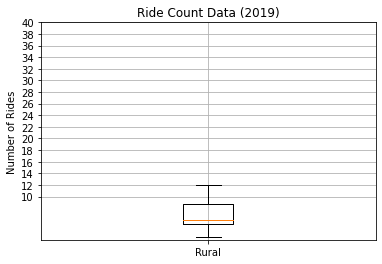

In [81]:
# Creat a box and whisker plot for rural ride count
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)
#add the ittle, y_axis label and grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10,41, step=2.0))
ax.grid()
plt.show()

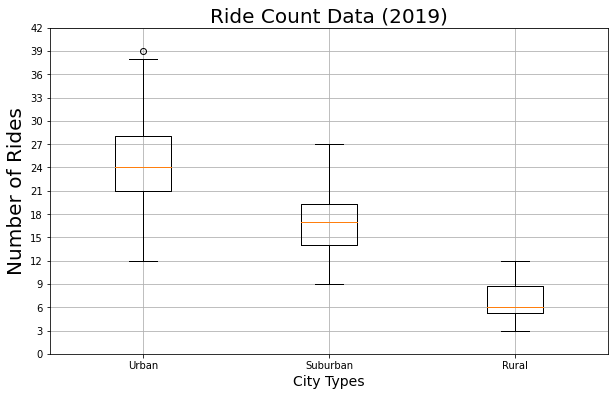

In [99]:
# Add all ride count box and whisker plots to the same graph
x_labels = ["Urban", "Suburban", "Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title('Ride Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Rides', fontsize=20)
ax.set_xlabel("City Types", fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0,45, step=3.0))
ax.grid()
#save the figure
plt.savefig("analysis/fig2.png")
plt.show()


In [100]:
# get the city with 39 aka identify the outlier
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


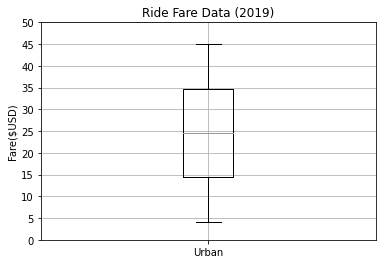

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [101]:
# Create a box and whisker for urban fares
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
#add the title, y acxis label and grid
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0,51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

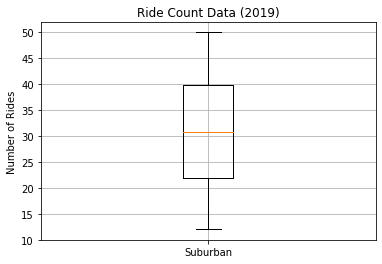

In [102]:
# Creat a box and whisker plot for suburban ride count
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)
#add the ittle, y_axis label and grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10,55, step=5.0))
ax.grid()
plt.show()

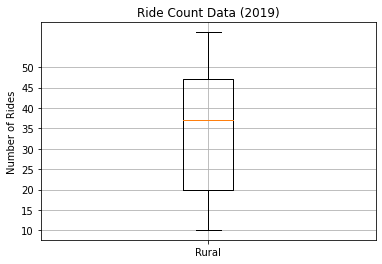

In [103]:
# Creat a box and whisker plot for rural ride count
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)
#add the ittle, y_axis label and grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10,55, step=5.0))
ax.grid()
plt.show()

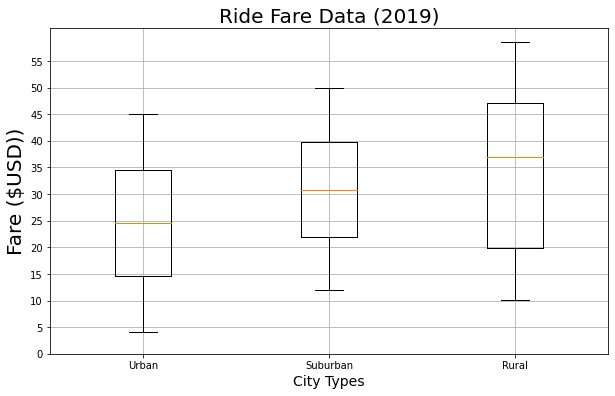

In [104]:
# Add all ride count box and whisker plots to the same graph
x_labels = ["Urban", "Suburban", "Rural"]
ride_count_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title('Ride Fare Data (2019)', fontsize=20)
ax.set_ylabel('Fare ($USD))', fontsize=20)
ax.set_xlabel("City Types", fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0,60, step=5.0))
ax.grid()
#save the figure
plt.savefig("analysis/fig3.png")
plt.show()



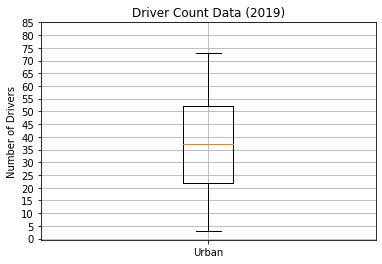

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [105]:
# Create a box and whisker for urban driver count data
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers, labels=x_labels)
#add the title, y acxis label and grid
ax.set_title("Driver Count Data (2019)")
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0,90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

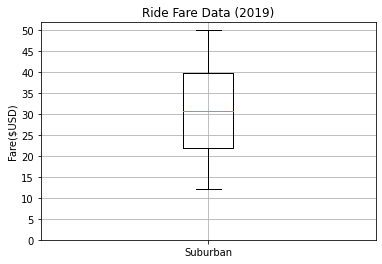

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [106]:
# Create a box and whisker for urban fares
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)
#add the title, y acxis label and grid
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0,51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()

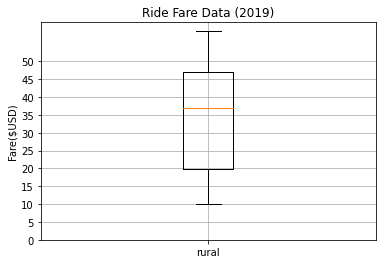

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [107]:
# Create a box and whisker for urban fares
x_labels = ["rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)
#add the title, y acxis label and grid
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0,51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_fares.describe()

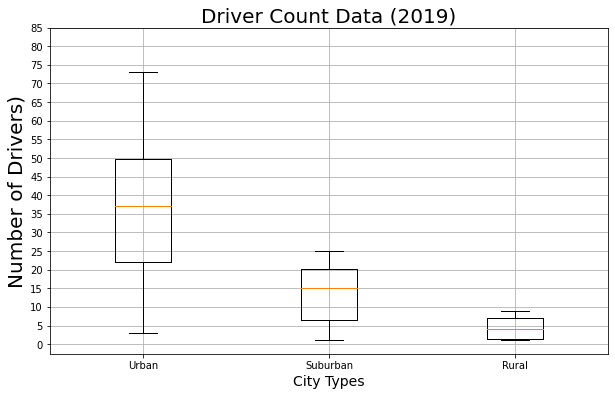

In [109]:
# Add all ride count box and whisker plots to the same graph
x_labels = ["Urban", "Suburban", "Rural"]
ride_count_data = [urban_driver_count, suburban_driver_count, rural_driver_count]
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title('Driver Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Drivers)', fontsize=20)
ax.set_xlabel("City Types", fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0,90, step=5.0))
ax.grid()
#save the figure
plt.savefig("analysis/fig4.png")
plt.show()




In [111]:
# get the sujm of the fares for each city tyype
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type


type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [112]:
# get the sum of all fares
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [114]:
# Calculate the percentage of fare for each city type
# type_percents = 100*sum_fares_by_type / total_fares
# type_percents
type_percents = 100*pyber_data_df.groupby(["type"]).sum()["fare"]/pyber_data_df["fare"].sum()
type_percents


type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

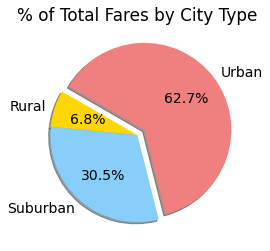

In [121]:
# build the percentage of fares by city type pie chart w. MATLAB approach
import matplotlib as mpl
plt.pie(type_percents, 
        labels=["Rural", "Suburban", "Urban"],
       colors=["gold", "lightskyblue", "lightcoral"],
        explode=[0,0,0.1],
        autopct='%1.1f%%',
       shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
mpl.rcParams['font.size']=14
#Save it
plt.savefig("analysis/Fig5.png")

plt.show()


In [ ]:
plt.style.